In [4]:
import folium
import numpy as np
import pandas as pd
import seaborn as sns
from time import sleep
import plotly.express as px
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
pd.set_option('display.max_columns', None)

In [9]:
df = pd.read_csv("df_Proyecto1_Animalia.csv")

In [69]:
# 1- GRAFICO DE DISPERSIÓN PARA VER LA RELACIÓN ENTRE EL PESO Y LA VELOCIDAD

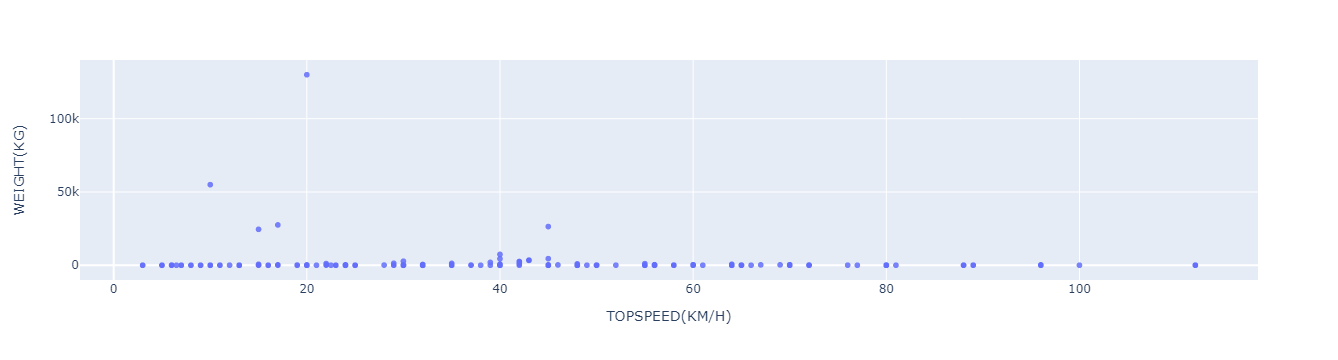

In [70]:
px.scatter(data_frame  = pd.read_csv("df_Proyecto1_Animalia.csv"),
           x           = "TOPSPEED(KM/H)",
           y           = "WEIGHT(KG)",
           hover_name  = "NAME",
           opacity     = 0.85) 
           #size        = "NAME")

In [71]:
#Con este gráfico podemos observar la relación entre la velocidad y el peso.
#En principio, cabe pensar que no hay relación alguna entre ambas, ya que, hay animales
#que tienen un peso considerable y alcanzan bastante velocidad, como es el caso del reno (Reindeer)
#que pesa una media de 131 Kg y alcanza unos 80 Km/h.

In [72]:
# 2 - GRAFICO PARA RELACIONAR LA ESPERANZA DE VIDA Y EL TAMAÑO DE POBLACION

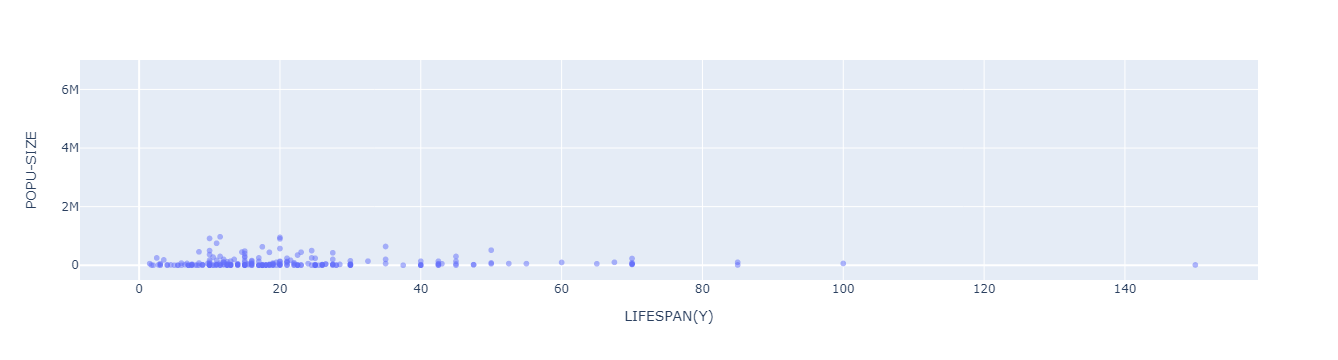

In [73]:
px.scatter(data_frame  = pd.read_csv("df_Proyecto1_Animalia.csv"),
           x           = "LIFESPAN(Y)",
           y           = "POPU-SIZE",
           #color       = "POPU-SIZE",
           hover_name  = "SUBORDER",
           opacity     = 0.5)
           #size        = "POPU-SIZE")

In [74]:
#En este gráfico podemos observar que a mayor esperanza de vida, menor tamaño de población.
#Por lo que, podemos decir que ambas variables presentan una relación inversa.

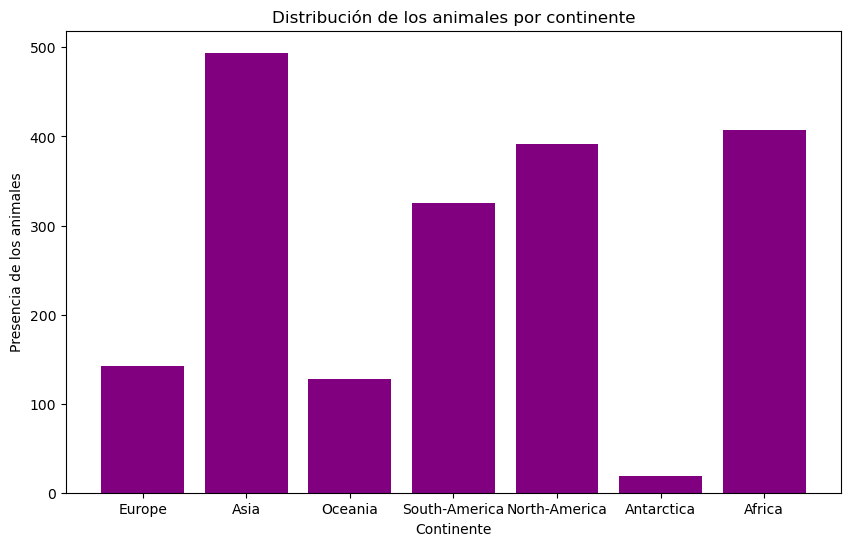

In [76]:
Europe = (df['EUROPE'] == 'Yes').sum()
Asia = (df["ASIA"] == 'Yes').sum()
Oceania = (df["OCEANIA"] == 'Yes').sum()
South_America = (df['SOUTH-AMERICA'] == 'Yes').sum()
North_America = (df['NORTH-AMERICA'] == 'Yes').sum()
Antarctica = (df['ANTARCTICA'] == 'Yes').sum()
Africa = (df['AFRICA'] == 'Yes').sum()
regiones = ['Europe', 'Asia', 'Oceania', 'South-America', 'North-America', 'Antarctica', 'Africa']

cantidad_yes = [Europe, Asia, Oceania, South_America, North_America, Antarctica, Africa]


plt.figure(figsize=(10, 6))
plt.bar(regiones, cantidad_yes, color='purple')
plt.xlabel('Continente')
plt.ylabel('Presencia de los animales')
plt.title('Distribución de los animales por continente')
plt.show()

In [78]:
#En este gráfico observamos la cantidad de animales que están presentes en los distintos continentes.
#En nuestro caso, hemos dividido América en Norte y Sur dependiendo de los datos proporcionados en la página web elegida.

In [79]:
#DATOS PARA CALCULAR EL SIGUIENTE GRAFICO

In [ ]:
# 3 GRAFICO PARA RELACIONAR LOS ANIMALES DOMESTICADOS Y NO DOMESTICADOS

In [89]:
porcentaje_nodomesticados = (len(df[df['DOMESTICATED'] == 'No domesticated'])/len(df[df['DOMESTICATED'] != np.nan]))*100
porcentaje_domesticados  = (len(df[df['DOMESTICATED'] == 'Domesticated'])/len(df[df['DOMESTICATED'] != np.nan]))*100

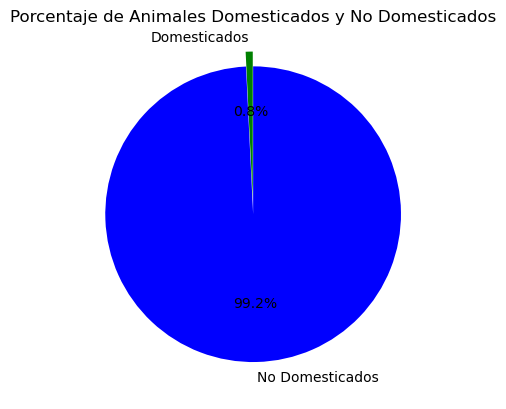

In [93]:
etiquetas = ['Domesticados', 'No Domesticados']
valores = [porcentaje_domesticados, porcentaje_nodomesticados]
colores = ['green', 'blue']
explode = (0.1, 0)
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=explode)
plt.title('Porcentaje de Animales Domesticados y No Domesticados')
plt.show()

In [22]:
#Como podemos observar, el 99.2% de los animales mamíferos no están domesticados.
#Esto podemos llegar a la conclusión:
#Existe diversidad en la vida silvestre puesto que, la mayor parte de los mamíferos 
#se encuentran en la naturaleza y no han sido objeto de domesticación.
#La domesticación de animales mamíferos representa una pequeña fracción en comparación 
#con los mamíferos no domesticados. Esto puede indicar que la influencia de los en la selección 
#y cría de animales domesticados es un proceso relativamente limitado.

In [23]:
# 4- GRAFICO POBLACIONES POR FAMILIA
#Con este gráfico se puede apreciar que la familia que tiene más población son los Ziphiidae (Delfines)
#seguido de los Simiiformes (Simios), para posteriormente analizar si existe relacion entre la esperanza de vida y la duración de 
#embarazo con el tamaño de la población.


C:\Users\kihun\AppData\Local\Temp\ipykernel_19020\2629457918.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



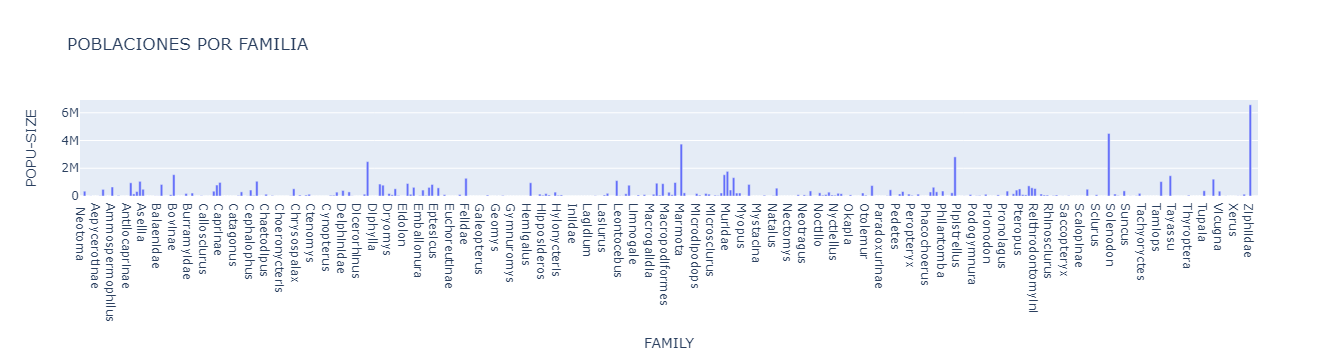

In [24]:

filtrado = df.groupby("FAMILY", as_index=False)["POPU-SIZE","PREGNANCY-DURATION(M)","LIFESPAN(Y)"].sum()
filtrado
px.bar(data_frame = filtrado,
       x          = "FAMILY",
       y          = "POPU-SIZE",
      barmode="group",
       title ="POBLACIONES POR FAMILIA")

C:\Users\kihun\AppData\Local\Temp\ipykernel_19020\1349303191.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



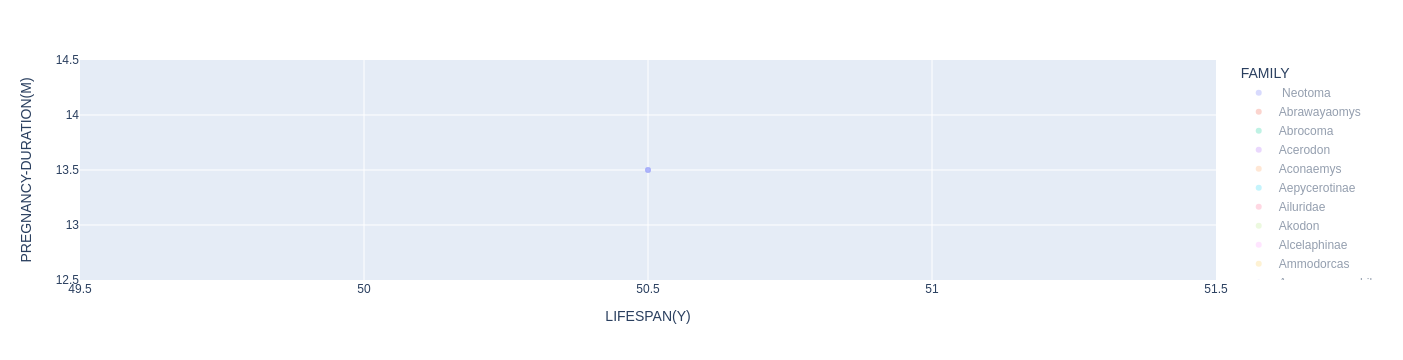

In [25]:
#5
filtrado = df.groupby("FAMILY", as_index=False)["POPU-SIZE","PREGNANCY-DURATION(M)","LIFESPAN(Y)"].mean()
filtrado

px.scatter(x = "LIFESPAN(Y)",
           y = "PREGNANCY-DURATION(M)",
           width       = None,
           height      = None,
           opacity     = 0.5,
           data_frame = filtrado, 
           hover_name="FAMILY",
           color = "FAMILY")

In [94]:
#En el caso de los Ziphiidae tienes una esperanza de vida de 50.5 años y embarazo que dura 13.5 de media, y por otro lado los Simiiformes, tienen una esperanza de vida media de 27 años y una duración media de 6 meses. 
# Encontramos que se mantiene una proporcion del 50% aproximadamente entre la esperanza de vida y los simiformes.

In [27]:
#6 - GRÁFICO PARA MOSTRAR CUÁNTA POBLACION TIENE DIFERENTES ESPERANZAS DE VIDA

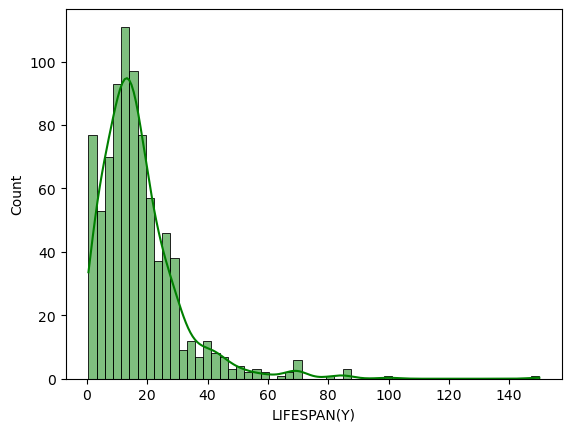

In [28]:
sns.histplot(df["LIFESPAN(Y)"], color = "green", kde=True)
plt.show()

In [29]:
#En este gráfico se puede observar que la mayoría de mamíferos estudiados presentan una esperanza
#de vida entre 15 y 20 años, aproximadamente.

In [30]:
#7- GRÁFICO PARA VER EL CICLO DE REPRODUCCION

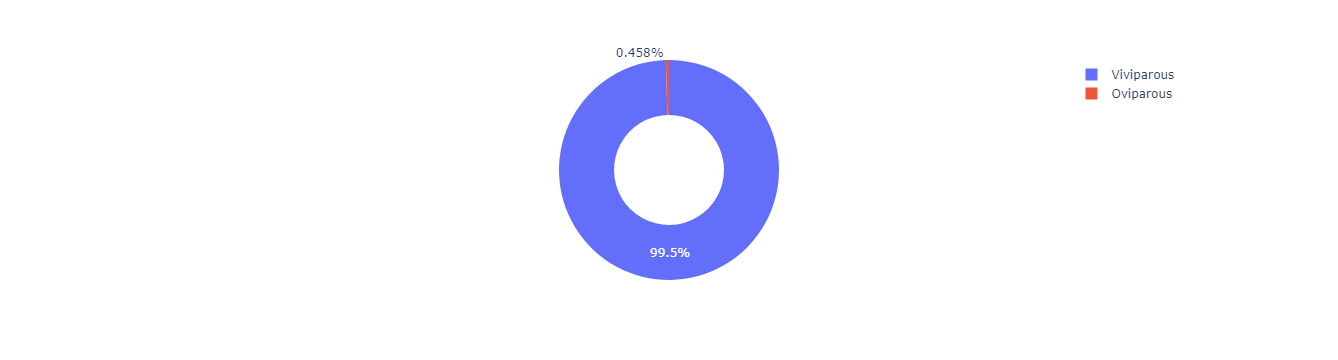

In [31]:
px.pie(data_frame = df.dropna(subset=['REPRODUCTION']),
       names      = "REPRODUCTION",
       hole       = 0.5)

In [32]:
#Como conclusión, decir que la gran mayoría de animales mamíferos son vivíparos, es decir, que dan a luz a sus crías.
#Uno de los animales mamíferos que son ovíparos es el Ornitorrinco.

In [33]:
# 8- GRÁFICO DE BARRAS SEGÚN SI ES MIGRATORIO O NO 

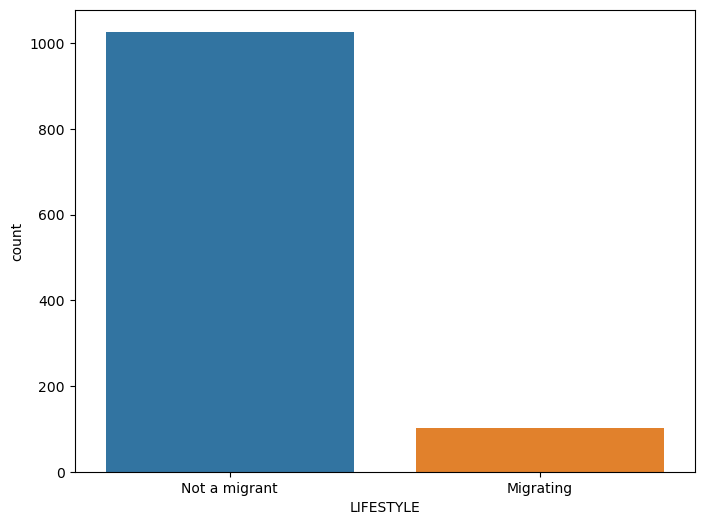

In [34]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["LIFESTYLE"])

plt.show() 

In [35]:
#La conclusión al gráfico anterior es que la mayoría de animales no migran de manera regular, salvo algunas especies
#que pueden migrar en función de la estación o búsqueda de alimento.


In [36]:
# 9- GRÁFICO PARA ANALIZAR SI SON SOCIALES O SOLITARIOS


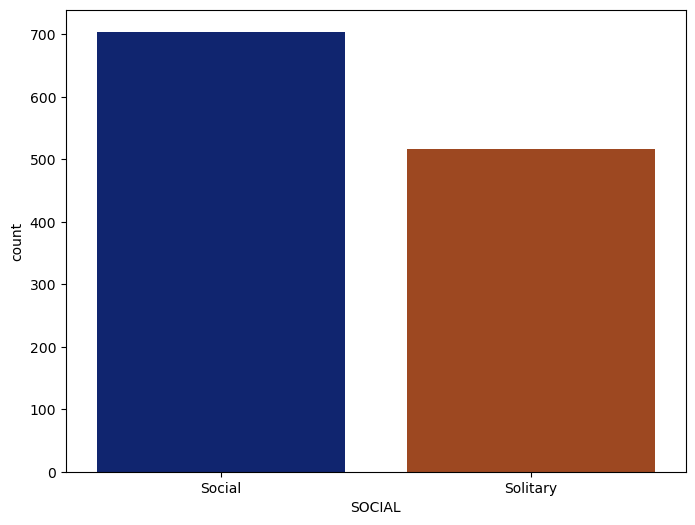

In [37]:
plt.figure(figsize = (8, 6))

sns.countplot(x = df["SOCIAL"], palette = "dark")


plt.show() 

In [38]:
#Observamos que están muy igualados los mamíferos sociales o solitarios. Esto se debe a que los mamíferos son un grupo muy diverso
#y su comportamiento social va a ser muy dispar según la especie.
#Algunos ejemplos de mamíferos sociales son los leones, los lobos, los delfines, etc..
#Algunos ejemplos de mamíferos solitarios son gato cerval, lince, oso pardo...

In [39]:
# 10 - GRÁFICO PLOTLY PARA VER EL PORCENTAJE DE LOS TIPOS DE MAMÍFEROS

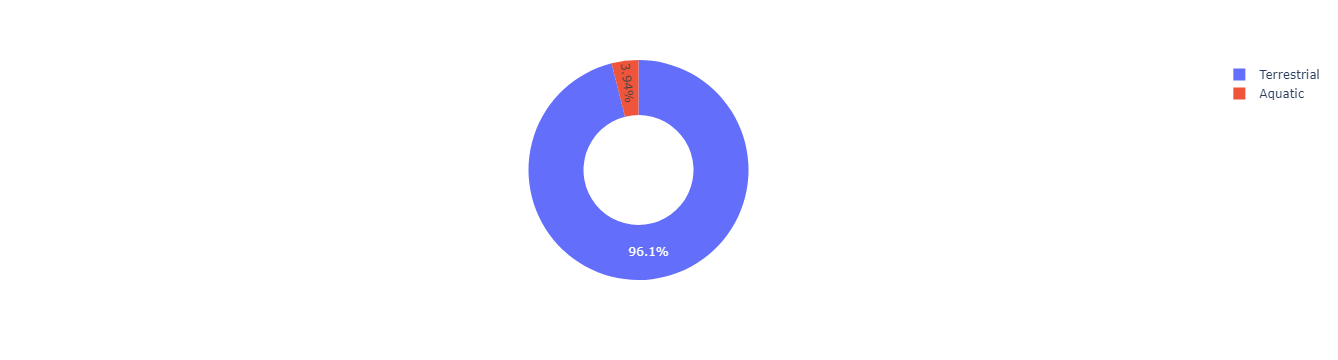

In [40]:
px.pie(data_frame = df.dropna(subset=['TYPE']),
       names      = "TYPE",
       hole       = 0.5)

In [41]:
#Más del 95% de los mamíferos son terrestres, y esto ha sido respaldado por los estudios de biología y algunas de las razones son:
#Por la evolución de sus antepasados terrestres.
#Por la anatomía de sus extremidades, ya que, están adaptados para moverse en tierra.
#Los hábitats terrestres, que incluyen bosques, praderas, desiertos y selvas, son algunos de los ecosistemas más extendidos en la Tierra.

In [42]:
# 11 - GRAFICO PARA VER EL PORCENTAJE DE TIPO SEXUAL

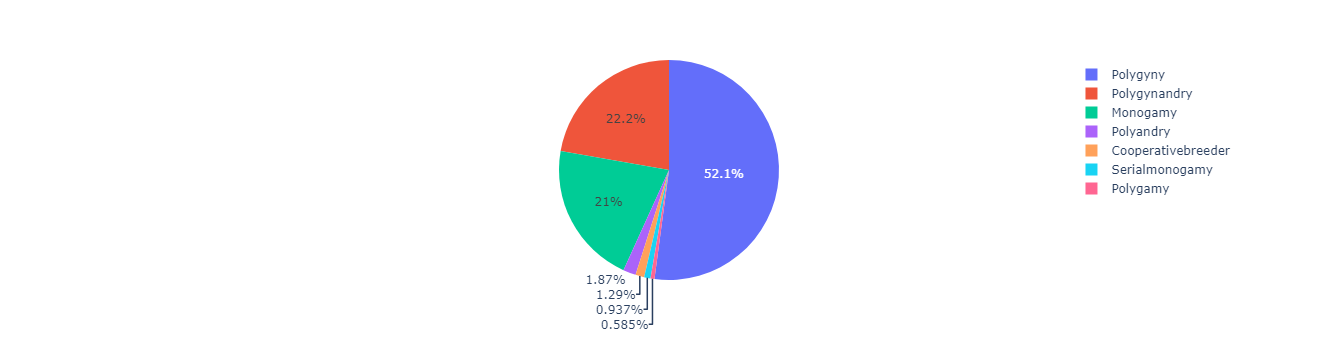

In [43]:
px.pie(data_frame = (df.dropna(subset=["MATING-BEHAVIOR"])),
       names = "MATING-BEHAVIOR")

In [44]:
#La mitad de los animales estudiados se encuentran en el sistema Polygyny, esto es que un macho se aparea con varias hembras pero
#la hembra se aparea con un solo macho.
#La otra mitad está dividida prácticamente por el sistema "Monogamy", es decir, una sola pareja sexual o "Polygynandry"
#es decir, tanto macho como hembra tienen varias parejas sexuales.

In [45]:
# 12 - GRÁFICOS PARA VER LA PRESENCIA DE LOS ANIMALES EN LOS DIFERENTES BIOMAS Y CLIMAS

In [15]:
Forest = (df['FOREST'] == 'Yes').sum()
Dunes = (df["DUNES"] == 'Yes').sum()
Rivers = (df["RIVERS"] == 'Yes').sum()
Marine = (df['MARINE'] == 'Yes').sum()
Reef = (df['REEF'] == 'Yes').sum()
Semi_Desert = (df['SEMI-DESERT'] == 'Yes').sum()
Steppe = (df['STEPPE'] == 'Yes').sum()
Freshwatter = (df['FRESHWATTER'] == 'Yes').sum()
Abyssal_Zone = (df['ABYSSAL-ZONE'] == 'Yes').sum()
Icecap = (df['ICECAP'] == 'Yes').sum()
Wetlands = (df['WETLANDS'] == 'Yes').sum()
Marsh = (df['MARSH'] == 'Yes').sum()
Lakes = (df['LAKES'] == 'Yes').sum()
Coastal = (df['COASTAL'] == 'Yes').sum()
Chaparral = (df['CHAPARRAL'] == 'Yes').sum()
Shrubland = (df['SHRUBLAND'] == 'Yes').sum() 
Rainforest = (df['RAINFOREST'] == 'Yes').sum()
Intertidal_Zone = (df['INTERTIDAL-ZONE'] == 'Yes').sum()
Urban = (df['URBAN'] == 'Yes').sum()
Benthic = (df['BENTHIC'] == 'Yes').sum()
Rocky_Areas = (df['ROCKY-AREAS'] == 'Yes').sum()
Grassland = (df['GRASSLAND'] == 'Yes').sum()
Savanna = (df['SAVANNA'] == 'Yes').sum() 
Mountains = (df['MOUNTAINS'] == 'Yes').sum() 
Riparian = (df['RIPARIAN'] == 'Yes').sum() 
Neritic_Zone = (df['NERITIC-ZONE'] == 'Yes').sum() 
Antrophogenic = (df['ANTROPHOGENIC'] == 'Yes').sum() 
Estuaries = (df['ESTUARIES'] == 'Yes').sum() 
Oceanic_Pelagic_Zone = (df['OCEANIC-PELAGIC-ZONE'] == 'Yes').sum() 
Caves = (df['CAVES'] == 'Yes').sum() 
Agricultural = (df['AGRICULTURAL'] == 'Yes').sum() 
Arid = (df['ARID'] == 'Yes').sum() 
Cold = (df['COLD'] == 'Yes').sum() 
Temperate = (df['TEMPERATE'] == 'Yes').sum() 
Polar = (df['POLAR'] == 'Yes').sum() 
Tropical = (df['TROPICAL'] == 'Yes').sum() 

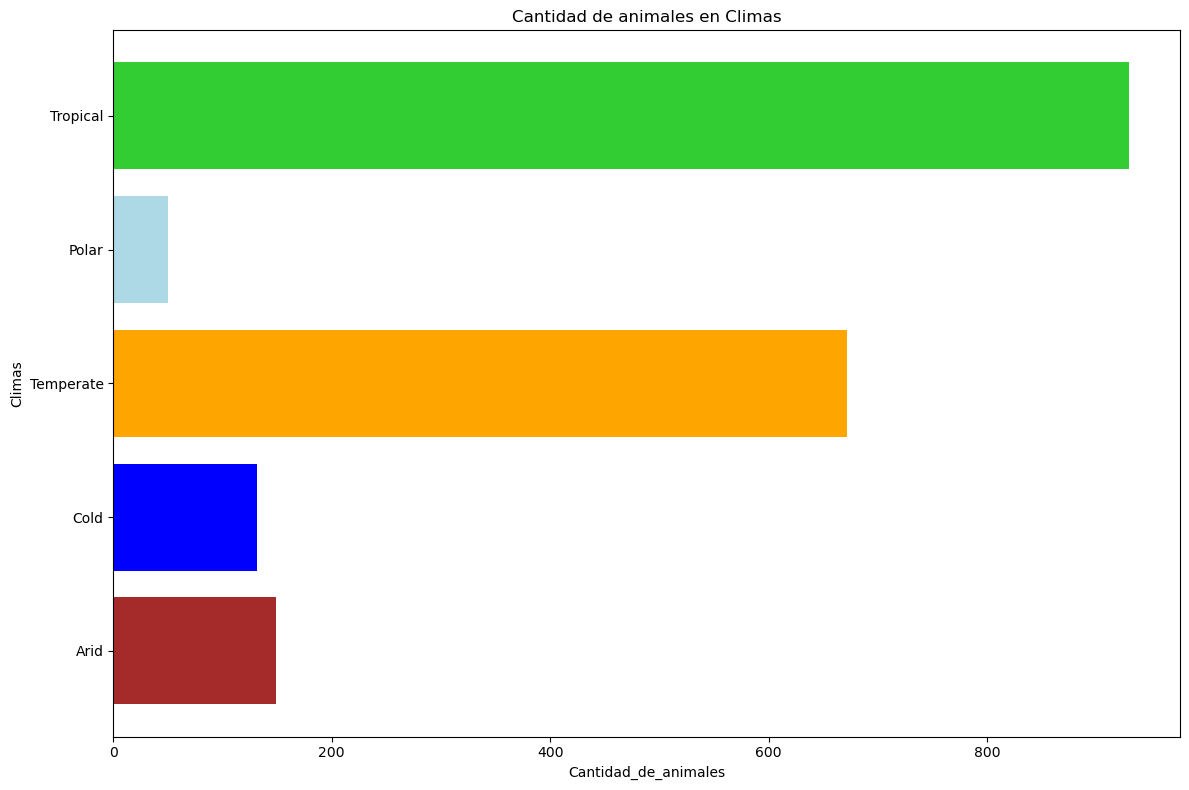

In [31]:
climas = ['Arid', "Cold", "Temperate", "Polar", "Tropical"]


Cantidad_de_animales = [Arid, Cold, Temperate, Polar, Tropical]
colores = ["brown", "blue", "orange", "lightblue", "limegreen"]

plt.figure(figsize=(12, 8))
plt.barh(climas, Cantidad_de_animales, color= colores)
plt.xlabel('Cantidad_de_animales')
plt.ylabel('Climas')
plt.title('Cantidad de animales en Climas')
plt.tight_layout()

plt.show()


In [ ]:
# En los climas tropicales (Tropical) y de temperaturas medias (Temperate) es donde habitan la gran mayoría de mamíferos.

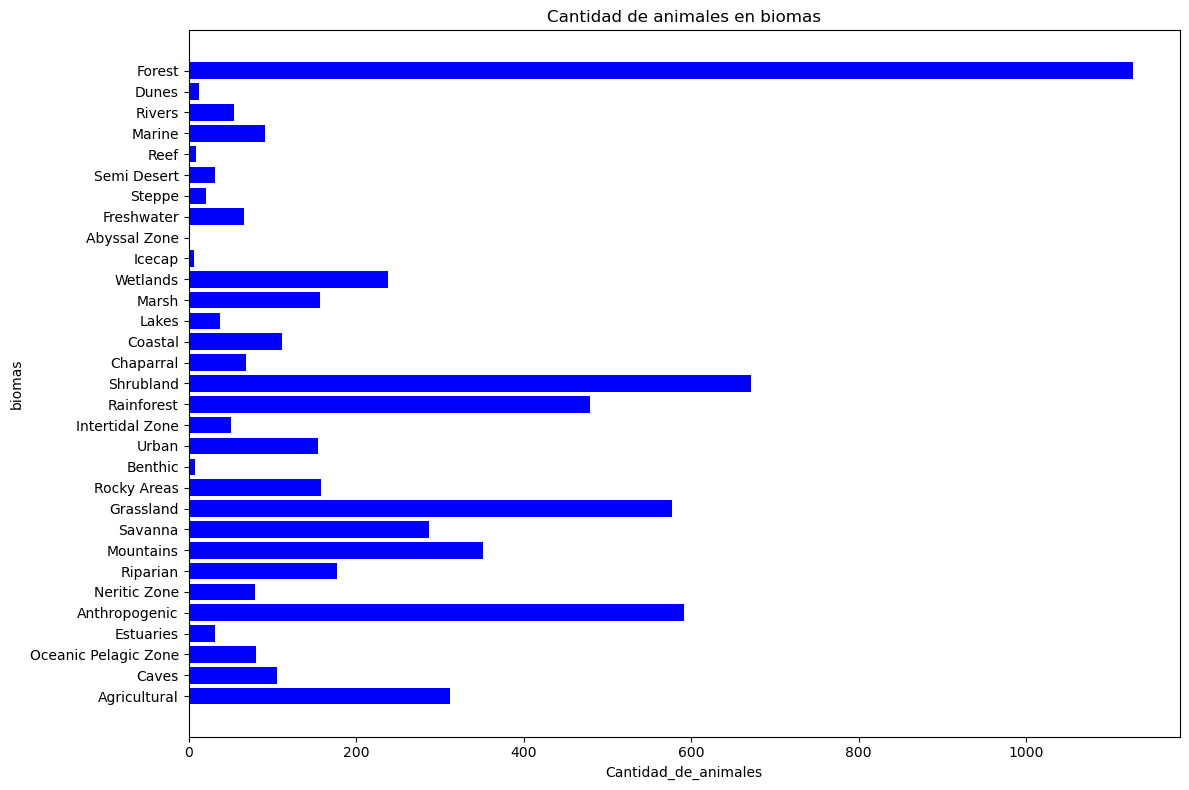

In [16]:
biomas = ['Forest', 'Dunes', 'Rivers', 'Marine', 'Reef', 'Semi Desert', 'Steppe', 'Freshwater',
                   'Abyssal Zone', 'Icecap', 'Wetlands', 'Marsh', 'Lakes', 'Coastal', 'Chaparral', 'Shrubland',
                   'Rainforest', 'Intertidal Zone', 'Urban', 'Benthic', 'Rocky Areas', 'Grassland', 'Savanna',
                   'Mountains', 'Riparian', 'Neritic Zone', 'Anthropogenic', 'Estuaries', 'Oceanic Pelagic Zone',
                   'Caves', 'Agricultural']


Cantidad_de_animales = [Forest, Dunes, Rivers, Marine, Reef, Semi_Desert, Steppe, Freshwatter, Abyssal_Zone, Icecap, Wetlands,
                Marsh, Lakes, Coastal, Chaparral, Shrubland, Rainforest, Intertidal_Zone, Urban, Benthic, Rocky_Areas,
                Grassland, Savanna, Mountains, Riparian, Neritic_Zone, Antrophogenic, Estuaries, Oceanic_Pelagic_Zone,
                Caves, Agricultural]


plt.figure(figsize=(12, 8))
plt.barh(biomas, Cantidad_de_animales, color='blue')
plt.xlabel('Cantidad_de_animales')
plt.ylabel('biomas')
plt.title('Cantidad de animales en biomas')
plt.tight_layout()

# Rotar etiquetas del eje y para mayor legibilidad
plt.gca().invert_yaxis()

plt.show()


In [48]:
#La mayoría de animales se encuentran en el bioma Bosque (Forest), también viven una gran variedad de mamíferos en zonas con pequeñas vegetaciones y matorrales (Shrubland), praderas (Grassland) y en la selva o zonas tropicales (Grassland).

In [49]:
# 13- GRAFICO PARA MEDIR LA RELACIÓN DE LAS VARIABLES

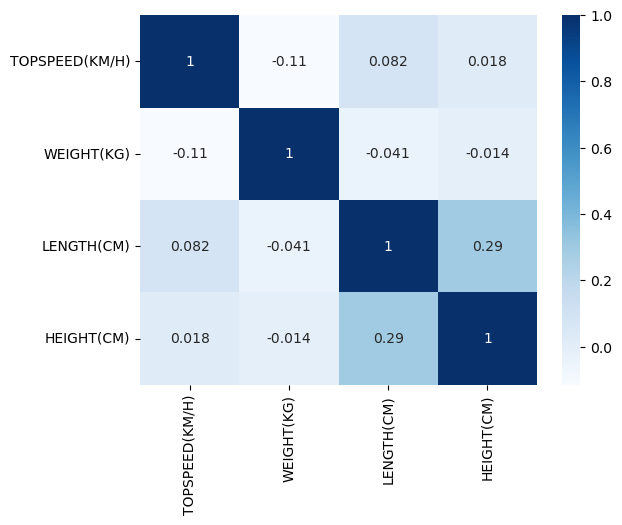

In [50]:
sns.heatmap(data = df[["TOPSPEED(KM/H)", "WEIGHT(KG)","LENGTH(CM)","HEIGHT(CM)"]].corr(),
            annot = True,
            cmap = "Blues")
plt.show()

In [51]:
# Conclusiones hay una proporcion del 30% entre la altura y la anchura

In [52]:
# 14- GRÁFICO PARA MOSTRAR LA RELACIÓN ENTRE LA EDAD DE INDEPENDENCIA, 
#EL PERIODO DE GESTACIÓN Y LAS CRÍAS QUE PUEDEN TENER EN EL EMBARAZO.

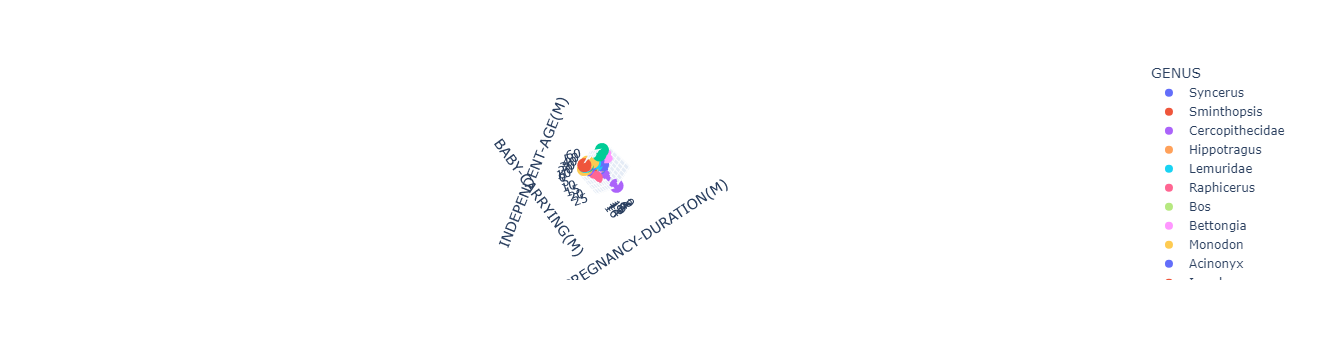

In [96]:
px.scatter_3d(data_frame = df,
              x          = "PREGNANCY-DURATION(M)",
              y          = "BABY-CARRYING(M)",
              z          = "INDEPENDENT-AGE(M)",
              hover_name = "GENUS",
              color = "GENUS")

In [54]:
#En resumen, estas variables son relevantes para comprender las estrategias 
#reproductivas y el comportamiento parental de los machos en una especie.

In [55]:
# 15- MAPA PARA VER GEOGRÁFICAMENTE LA CANTIDAD DE ANIMALES POR CONTINENTE

In [7]:
EUROPE = [51.1657, 10.4477]
ASIA = [47.3902, 103.3270]
OCEANIA = [-25.2744, 133.7751]
SOUTH_AMERICA = [-12.6392, -69.0977]
NORTH_AMERICA = [54.5260, -105.2551]
ANTARCTICA = [-90.0000, 0.0000]
AFRICA = [1.2921, 17.6224]

africa = [AFRICA] * len(df[df["AFRICA"] == "Yes"])
antartica = [ANTARCTICA] * len(df[df["ANTARCTICA"] == "Yes"])
north_america = [NORTH_AMERICA] * len(df[df["NORTH-AMERICA"] == "Yes"])
south_america = [SOUTH_AMERICA] * len(df[df["SOUTH-AMERICA"] == "Yes"])
oceania = [OCEANIA] * len(df[df["OCEANIA"] == "Yes"])
asia = [ASIA] * len(df[df["ASIA"] == "Yes"])
europe = [EUROPE] * len(df[df["EUROPE"] == "Yes"])
continentes = africa + antartica + north_america + south_america + oceania + asia + europe



#  PUNTOS DE OCIO EN EL MAPA
data = []
data1 = []
sf_map = folium.Map()
# df = df.drop(df.iloc[[65]].index).reset_index(drop=True)

for n in continentes: 
    data1 = [n[0], n[1]]
    data.append(data1)
    data1 = []
    
HeatMap(data, radius=100).add_to(sf_map)
                               
sf_map

In [97]:
# 16- MAPA-RADAR QUE ENCUENTRA LAS CARACTERISTICAS FISICAS DE LOS ANIMALES VENENOSOS
#Encontramos que los animales venesoso tienden a ser animales pequeños, de poco peso y de longitudes menores a 1 metros, podemos asumir que el veneno es su caractistica defensiva u ofensiva.

Sunda Slow Loris


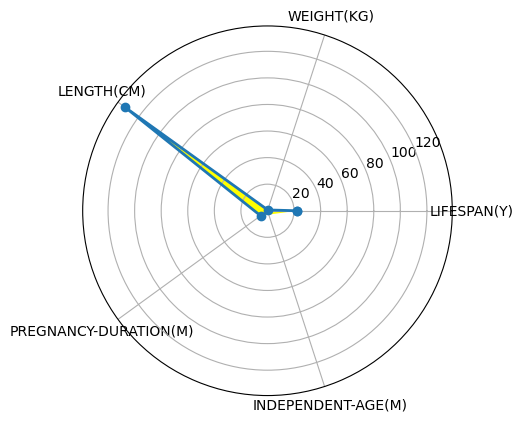

Eurasian Water Shrew


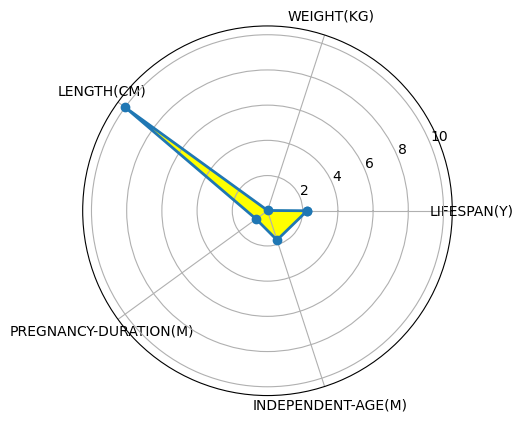

Pygmy Slow Loris


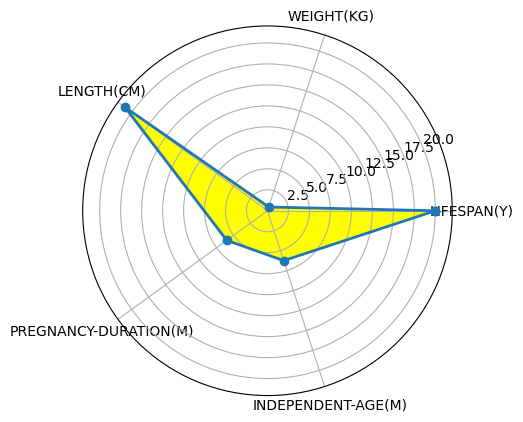

Platypus


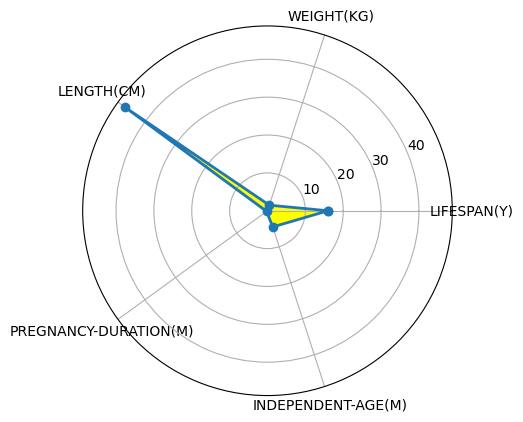

Bengal Slow Loris


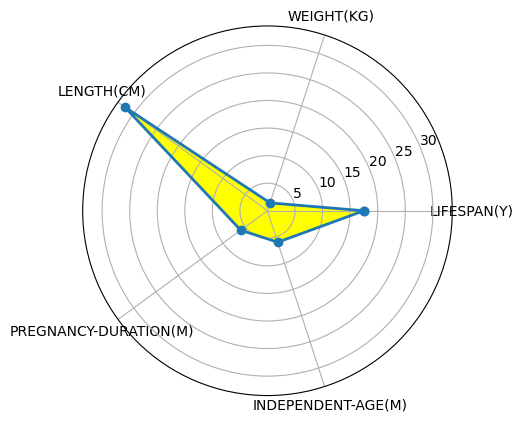

In [98]:
df2 = df[~(df["POISONOUS"] == "No")]
columns_to_select = ["NAME","LIFESPAN(Y)", "WEIGHT(KG)", "LENGTH(CM)","PREGNANCY-DURATION(M)","INDEPENDENT-AGE(M)"]
df3 = df2[columns_to_select].reset_index(drop=True)
for i in range(5):
    
    labels = df3.columns[1:]

    pattern = df3.iloc[i, 1:]

    angles = np.linspace(0, 2*np.pi, len(labels), endpoint = False)
    
    print(df3.iloc[i, 0])

    # Esto es para añadir el último lado del polígono:
    pattern = np.concatenate((pattern, [pattern[0]]))
    angles = np.concatenate((angles, [angles[0]]))


    fig = plt.figure()
    ax = fig.add_subplot(polar = True)

    ax.plot(angles, pattern, "o-", linewidth = 2)           # Lineas en azul
    ax.fill(angles, pattern, alpha = 1, color = "yellow")   # Relleno amarillo
    ax.set_thetagrids(angles[:-1] * 180/np.pi, labels)      # Malla

    plt.show()